In [1]:
#import the dataset
import pandas as pd
df=pd.read_csv('tested.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Exploration and Preprocessing 

In the above dataset the features indicate the following:

Survived-->0 = Dead 1 = Alive

Pclass-->1 = First class 2 = Second class 3 = Third class

SibSP-->Number of Siblings/Spouse 

Parch-->Number Parent/Children

Embarked-->Port of Embarkation C=Cherbourg  Q=Queenstown  S=Southampton

In [3]:
#find the number of rows and columns in the dataset
df.shape

(418, 12)

In [4]:
#get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#generate descriptive statistics of the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#find the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

From the above output we can conclude that:

1.Age column had 86 null values. Since age can be an important feature in determining the survival prediction we cannot drop the null values. Hence we can fill the null values with the mean value of age column.

2.Fare column has only one null value, which can be set to 0

3.Cabin column has a significant number of missing values and it wouldn't be an important feature hence we can drop it

In [7]:
#Lets set the fare column missing value to 0
df['Fare'].fillna(0,inplace=True)  
#inplace=True represents that the changes are made directly to the dataframe without creating any copy

In [8]:
df['Fare'].isnull().sum()

0

In [9]:
#Drop the cabin column
df=df.drop('Cabin',axis=1)
#axis=1 implies column should be dropped
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
df.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    41.333333
        male      40.520000
2       female    24.376552
        male      30.940678
3       female    23.073400
        male      24.525104
Name: Age, dtype: float64

In [11]:
#fill the missing values in age column with mean
#mean_value=round(df['Age'].mean(),1)
#df['Age'].fillna(mean_value,inplace=True)
#df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].mean())
df['Age']=df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('mean'))

In [12]:
#mean_value
df['Age']=df['Age'].round(1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [13]:
df['Age'].isnull().sum()

0

In [14]:
#the number of males and females in the ship
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [15]:
#count the embarked regions
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [16]:
#find the categorical columns in the dataset
catcols=[col for col in df.columns if df[col].dtype=='O']
catcols

['Name', 'Sex', 'Ticket', 'Embarked']

In [17]:
#Lets perform label encoding on Gender column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

C:\Users\Sanjana\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
df['Sex'].value_counts()
#where 1 indicates male and 0 indicated female

1    266
0    152
Name: Sex, dtype: int64

In [19]:
#Encoding the Embarked column
df=pd.get_dummies(df,columns=['Embarked'],prefix='Embarked')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1


### Data Visualization 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Female Passengers')

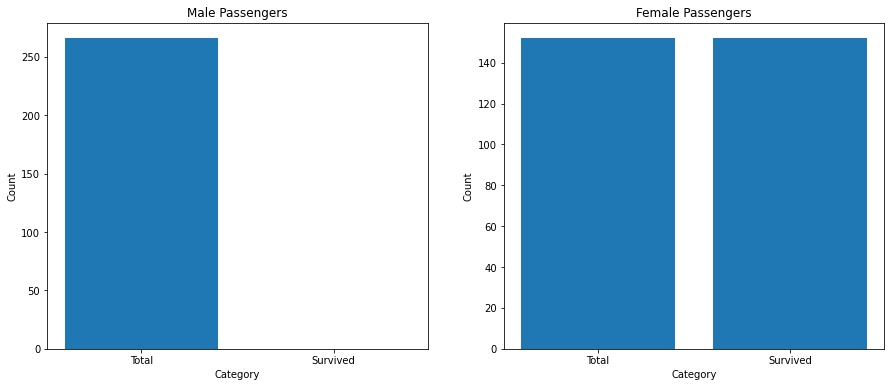

In [21]:
#lets find out the survival count in males and females
total_males = df[df['Sex'] == 1].shape[0]
survived_males = df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0]
total_females = df[df['Sex'] == 0].shape[0]
survived_females = df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0]

fig,ax=plt.subplots(1, 2, figsize=(15, 6))

ax[0].bar(['Total','Survived'],[total_males,survived_males])
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].set_title('Male Passengers')

ax[1].bar(['Total','Survived'],[total_females,survived_females])
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
ax[1].set_title('Female Passengers')

Based on the above plots we can conclude that none of the males from the ship survived whereas all the females survived.
Hence we can predict that females have a greater chance of survival

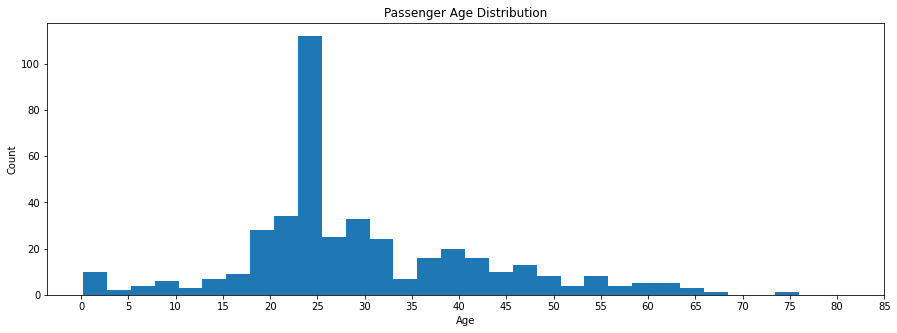

In [22]:
#lets find out the age distribution of the passengers using a histogram
plt.figure(figsize=(15,5))
plt.hist(df['Age'], bins=30)
plt.xlabel('Age')
plt.xticks(range(0, 90, 5))
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()

From the above histogram we can conclude that there were more number passengers aged between 20 and 25. Whereas the count of children and aged people are very less

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


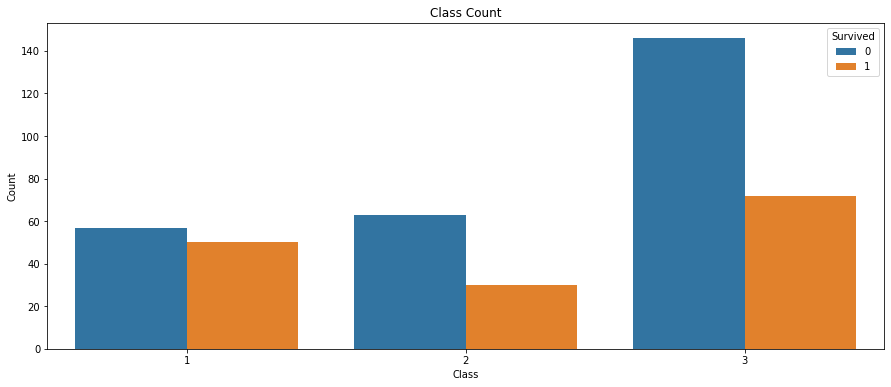

In [23]:
#lets find out the count of passengers survived based on class
plt.figure(figsize=(15,6))
sns.countplot('Pclass',hue='Survived',data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Count')
plt.show()

### Model Selection and Training 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#divide the dataset into feature and target set
x=df.drop(['Survived','Name','Ticket','PassengerId'],axis=1)
y=df['Survived']

In [26]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [27]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [28]:
#divide the above to training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
#Model-Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [30]:
lr.fit(x_train,y_train)

C:\Users\Sanjana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr_pred=lr.predict(x_test)

In [32]:
lr_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [33]:
#Model-Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [34]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
rfc_pred=rfc.predict(x_test)

In [36]:
rfc_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

### Model Evaluation 

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
#Model-Logistic Regression
#accuracy of the model
accuracy_score(y_test,lr_pred)

1.0

In [39]:
print('\nClassification Report\n',classification_report(y_test,lr_pred))


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [40]:
#Model-Random Forest
#accuracy of the model
accuracy_score(y_test,rfc_pred)

1.0

In [41]:
print('\nClassification Report\n',classification_report(y_test,rfc_pred))


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

